In [1]:
import csv
import os

%load_ext autoreload
%autoreload 2

In [39]:
import data_processing as dp
import datetime as dt

char_set={'q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m',\
#          'Q','W','E','R','T','Y','U','I','O','P','A','S','D','F','G','H','J','K','L','Z','X','C','V','B','N','M',\
          '<bcksp>','<lshft>','spc'}
input_case=['library']
log_buffer=dt.timedelta(seconds=1)

log_data,lh_accel,lh_gyro,lh_gravity,rh_accel,rh_gyro,rh_gravity=dp.preprocess_data(char_set,input_case,log_buffer)
# print shapes
print "log_data shape:",log_data.shape
print "lh_accel shape:",lh_accel.shape
print "lh_gyro shape:",lh_gyro.shape
print "lh_gravity shape:",lh_gravity.shape
print "rh_accel shape:",rh_accel.shape
print "rh_gyro shape:",rh_gyro.shape
print "rh_gravity shape:",rh_gravity.shape

total number of files in  library : 8
Successfully completed 1 files
Successfully completed 2 files
Successfully completed 3 files
Successfully completed 4 files
Successfully completed 5 files
Successfully completed 6 files
Successfully completed 7 files
Successfully completed 8 files
log_data shape: (7228, 3)
lh_accel shape: (125763, 4)
lh_gyro shape: (80845, 4)
lh_gravity shape: (170682, 4)
rh_accel shape: (164087, 4)
rh_gyro shape: (120316, 4)
rh_gravity shape: (70975, 4)


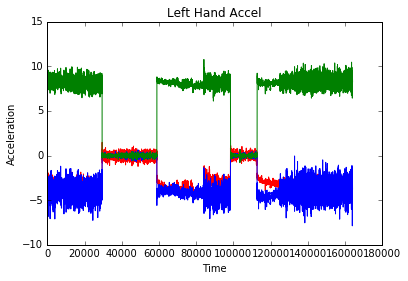

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
num_samples=rh_accel.shape[0]
plt.plot(range(num_samples),rh_accel[:,1],'r-',range(num_samples),rh_accel[:,2],'b-',range(num_samples),rh_accel[:,3],'g-')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Left Hand Accel')
plt.show()

In [40]:
import numpy as np
import pickle
window_time=dt.timedelta(microseconds=1200000)
Xtr, ytr, Xva, yva, Xte, yte, char_to_indx, indx_to_char=dp.process_data(log_data,lh_accel,lh_gyro,lh_gravity,\
                rh_accel,rh_gyro,rh_gravity,window_time,char_set,0.2,0.2,data_sampling='random')

# print data shape
print "Xtr shape:",Xtr.shape
print "ytr shape:",ytr.shape
print "Xva shape:",Xva.shape
print "yva shape:",yva.shape
print "Xte shape:",Xte.shape
print "yte shape:",yte.shape
print "len(char_to_indx):",len(char_to_indx)
print "len(indx_to_char):",len(indx_to_char)

Completed iteration  0 / 7228
Completed iteration  200 / 7228
Completed iteration  400 / 7228
Completed iteration  600 / 7228
Completed iteration  800 / 7228
Completed iteration  1000 / 7228
Completed iteration  1200 / 7228
Completed iteration  1400 / 7228
Completed iteration  1600 / 7228
Completed iteration  1800 / 7228
Completed iteration  2000 / 7228
Completed iteration  2200 / 7228
Completed iteration  2400 / 7228
omitting keylog instance: [datetime.datetime(2017, 11, 14, 16, 35, 42, 370191) '[18]' 'o']
omitting keylog instance: [datetime.datetime(2017, 11, 14, 16, 35, 42, 460896) '[21]' 'f']
omitting keylog instance: [datetime.datetime(2017, 11, 14, 16, 35, 42, 564558) '[39]' 'spc']
omitting keylog instance: [datetime.datetime(2017, 11, 14, 16, 35, 42, 762873) '[14]' 't']
omitting keylog instance: [datetime.datetime(2017, 11, 14, 16, 35, 42, 874693) '[23]' 'h']
omitting keylog instance: [datetime.datetime(2017, 11, 14, 16, 35, 42, 945262) '[17]' 'i']
omitting keylog instance: [dat

In [41]:
data=dict()
data['X_train']=Xtr
data['y_train']=ytr
data['X_val']=Xva
data['y_val']=yva
data['X_test']=Xte
data['y_test']=yte
data['char_to_indx']=char_to_indx
data['indx_to_char']=indx_to_char
pickle.dump(data, open( "1.2s_original_rand_space.p", "wb" ) )
print "Done"

Done
